**Word Cloud**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#read the data from csv file
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Youtube01-Psy.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
print(stopwords)

{'however', 'r', 'therefore', 'she', 'but', 'into', "wasn't", "you're", 'because', 'off', 'these', "i'd", 'below', 'on', 'few', 'to', 'down', "we've", 'yourselves', 'up', 'a', "here's", 'from', "haven't", 'its', 'him', 'then', 'all', "he'd", 'shall', 'has', 'there', "there's", "shan't", 'yourself', 'whom', 'until', 'cannot', "mustn't", 'if', "we're", 'again', 'being', 'them', 'ours', 'only', 'are', 'most', 'nor', "they'd", "shouldn't", 'not', 'more', 'each', 'both', 'we', 'they', 'those', 'before', 'http', "why's", 'your', 'could', 'as', 'ourselves', 'so', "weren't", 'by', "she's", "who's", "they'll", "that's", "she'd", 'through', "didn't", 'here', 'when', 'had', "how's", 'otherwise', 'such', 'he', 'other', "i'll", 'theirs', 'which', 'itself', 'while', "hadn't", "can't", 'themselves', "you'd", 'since', 'hence', "he's", "i've", 'been', 'like', 'once', "she'll", 'herself', 'and', 'can', 'does', 'during', 'having', 'the', 'were', 'my', 'was', 'than', 'under', 'for', 'about', 'you', 'k', '

In [ ]:
# iterate through the csv file
for val in df.CONTENT:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

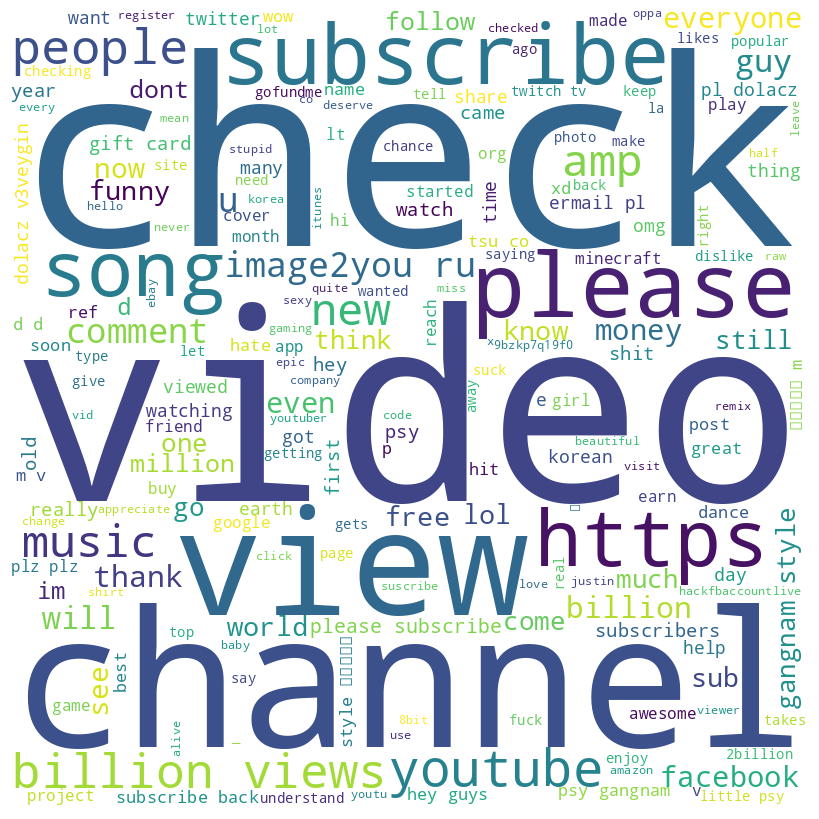

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

** italicized textFlower_prediction**

---



In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
#each point is length, width, type(0,1)
data =[[3,1.5,  1], #length, width, class
       [2, 1,   0],
       [4, 1.5, 1],
       [3, 1,   0],
       [3.5, .5, 1],
       [2, .5,  0],
       [5.5, 1, 1],
       [1,  1,  0]]

In [ ]:
mystery_flower= [4,1.5]

In [ ]:
data[2][1] #2, 1 the element is choosen

1.5

In [ ]:
b=0

In [ ]:
def sigmoid(x): #activation Function
  return 1/(1+np.exp(-x))
def sigmoid_p(x):
  return sigmoid(x) * (1-sigmoid(x))

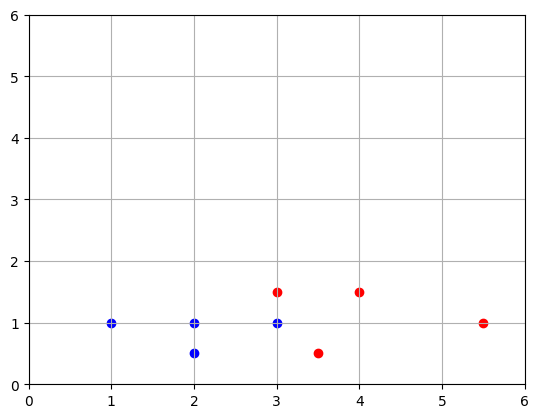

In [ ]:
#scatter data
plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
  point = data[i]
  color ='r'
  if point[2] == 0:
    color = 'b'
  plt.scatter(point[0],point[1], c=color)

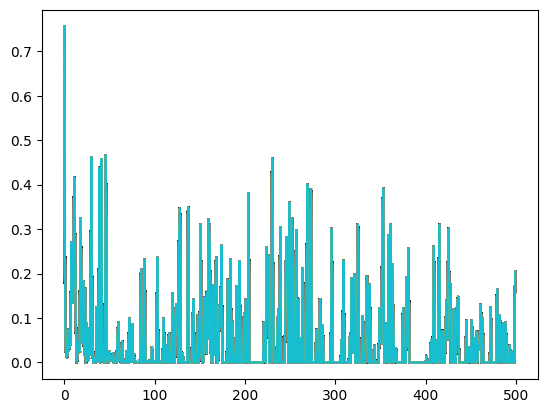

In [ ]:
#training loop
learning_rate = 0.19
costs = []
#Network
w1=np.random.randn()
w2=np.random.randn()
b=np.random.randn()

for i in range(50000):
  ri= np.random.randint(len(data))
  point=data[ri]
  z = point[0] * w1 + point[1] * w2 +b #weights + bias value taken
  pred = sigmoid(z)
  target = point[2]
  cost =np.square(pred - target)
  #print(point)
  #if i % 1000 == 0:
  #print(cost)
  dcost_pred = 2 * (pred-target)
  dpred_dz = sigmoid_p(z)
  dz_dw1 = point[0]
  dz_dw2 = point[1]
  dz_db = 1
  dcost_dz = dcost_pred * dpred_dz
  dcost_dw1 = dcost_dz * dz_dw1
  dcost_dw2 = dcost_dz * dz_dw2
  dcost_db = dcost_dz * dz_db
  w1 = w1- learning_rate * dcost_dw1
  w2 = w2-learning_rate * dcost_dw2
  b = b-learning_rate * dcost_db
  if i % 100 == 0:
    cost_sum = 0
    for j in range(len(data)):
      point = data[ri]

      z = point[0] * w1 + point[1] * w2 + b

      target = point[2]
      cost_sum += np.square(pred-target)
    costs.append(cost_sum/len(data))
  plt.plot(costs)

In [ ]:
w1

6.755722171519602

In [ ]:
w2

3.1861805429725507

In [ ]:
b

In [ ]:
for i in range(len(data)):
  point = data[i]
  print(point)
  z = point[0] * w1 + point[1] * w2 + b
  pred = sigmoid(z)
  print("pred:{}".format(pred))

[3, 1.5, 1]
pred:0.7938274947781578
[2, 1, 0]
pred:0.0009104511113530303
[4, 1.5, 1]
pred:0.9996977262352081
[3, 1, 0]
pred:0.43906998761335025
[3.5, 0.5, 1]
pred:0.8234405192945231
[2, 0.5, 0]
pred:0.00018522578767675985
[5.5, 1, 1]
pred:0.9999999409196921
[1, 1, 0]
pred:1.0609108555558054e-06


In [ ]:
z= mystery_flower[0] * w1 + mystery_flower[1] * w2 + b #it belongs to class 1
pred = sigmoid(z)
pred

0.9996977262352081